In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
real_image = Image.open("./test/real-fake/original.jpg")

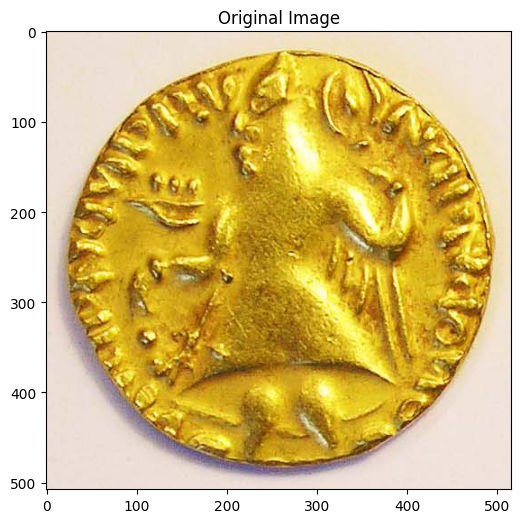

In [19]:
plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(real_image)
plt.axis("on")
plt.show()

In [11]:
print(real_image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=516x508 at 0x7EFCC288AD90>


In [18]:
img = np.array(real_image)
img.shape

(508, 516, 3)

In [122]:
x, y, width, height = 100, 190, 5, 150

In [123]:
# Mask
mask = np.zeros_like(img)
mask[y:y+height, x:x+width] = 1

In [124]:
# Noise
noise = np.random.normal(0, 0, img.shape).astype(np.uint8)

noise_region = np.where(mask == 1,noise, img)
noise.shape, noise_region.shape

((508, 516, 3), (508, 516, 3))

In [125]:
#mask = np.zeros_like(img)
#mask[y:y+height, x:x+width+150] = 1

In [126]:
new_image = np.where(mask == 1, noise_region, img)
new_image

array([[[237, 223, 212],
        [237, 223, 212],
        [237, 223, 212],
        ...,
        [243, 229, 218],
        [243, 229, 218],
        [243, 229, 218]],

       [[237, 223, 212],
        [237, 223, 212],
        [237, 223, 212],
        ...,
        [243, 229, 218],
        [243, 229, 218],
        [243, 229, 218]],

       [[237, 223, 212],
        [237, 223, 212],
        [237, 223, 212],
        ...,
        [243, 229, 218],
        [243, 229, 218],
        [243, 229, 218]],

       ...,

       [[236, 221, 214],
        [236, 221, 214],
        [236, 221, 214],
        ...,
        [239, 226, 218],
        [239, 226, 218],
        [239, 226, 218]],

       [[236, 221, 214],
        [236, 221, 214],
        [236, 221, 214],
        ...,
        [239, 226, 218],
        [239, 226, 218],
        [239, 226, 218]],

       [[236, 221, 214],
        [236, 221, 214],
        [236, 221, 214],
        ...,
        [239, 226, 218],
        [239, 226, 218],
        [239, 226, 218]]

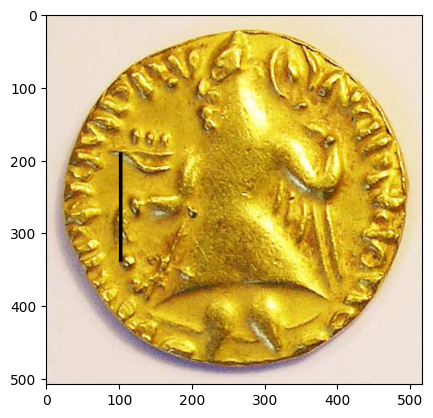

In [127]:
plt.imshow(new_image)

In [224]:
def gaussian_noise(img, serverity=1):
    mean = 0
    var = 0.1 * serverity
    sigma = var * 1
    gauss = np.random.normal(mean, sigma, img.shape)
    noisy = img + gauss
    return noisy
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


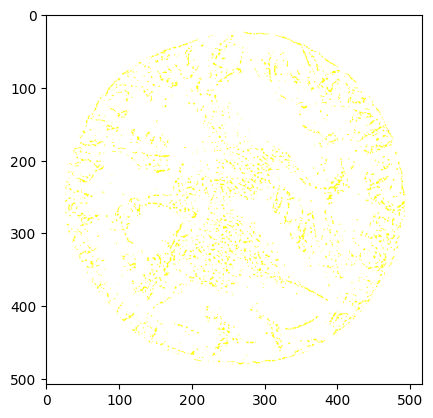

In [227]:
img1 = gaussian_noise(img, serverity=2)
plt.imshow(img1)
# new_image.shape

In [232]:
def speckle(img, severity=1):
    x, y, z = img.shape
    severity *= 1
    noise = np.random.randn(x, y, z) * severity
    noisy = img + img * noise
    return noisy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


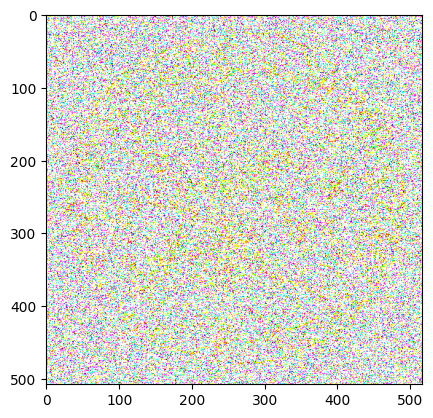

In [233]:
img2 = speckle(img, severity=1)
plt.imshow(img2)

In [247]:
def add_gaussian_noise(img, mean=10, std=10):
    noisy_image = img + np.random.normal(mean, std, img.shape).astype(np.uint8)
    return noisy_image

In [248]:
img3 = add_gaussian_noise(img)

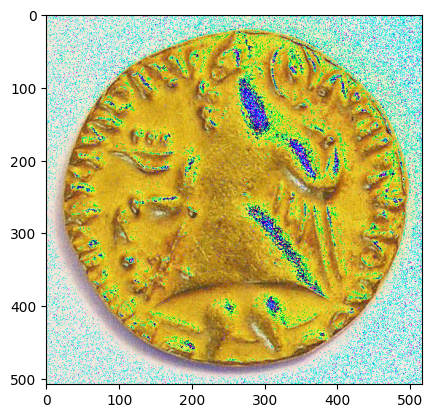

In [249]:
plt.imshow(img3)